## SENTIMENT ANALYSIS

### IMPORTING NECESSARY LIBRARIES

In [160]:
import requests
import gensim
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize


### Step 1: Web Scrapping

In [173]:
url = 'https://www.dw.com/en/india-manipur-media-violence/a-66473187'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
paragraphs = soup.find_all('p')

### Step 2: Combine paragraphs into a single text

In [174]:
document = ' '.join([p.get_text() for p in paragraphs])

### Step 3: Sentiment Analysis

In [175]:
sid = SentimentIntensityAnalyzer()
sentiment_scores = sid.polarity_scores(document)

#### Determining the sentiments based on the sentiment_scores 

In [176]:

if sentiment_scores['compound'] >= 0.05:
    sentiment = 'Positive'
elif sentiment_scores['compound'] <= -0.05:
    sentiment = 'Negative'
else:
    sentiment = 'Neutral'

print(f"Sentiment: {sentiment}")
print(f"Sentiment Scores: {sentiment_scores}")



Sentiment: Negative
Sentiment Scores: {'neg': 0.134, 'neu': 0.779, 'pos': 0.087, 'compound': -0.9936}


### Step 4: Text Summarization

In [177]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

def custom_summarize(document, num_sentences=2):
    # Tokenize the document into words and sentences
    words = word_tokenize(document)
    sentences = sent_tokenize(document)

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]

    # Calculate word frequencies
    word_freq = FreqDist(filtered_words)

    # Calculate sentence scores based on word frequencies
    sentence_scores = {}
    for sentence in sentences:
        for word in word_tokenize(sentence.lower()):
            if word in word_freq:
                if sentence not in sentence_scores:
                    sentence_scores[sentence] = word_freq[word]
                else:
                    sentence_scores[sentence] += word_freq[word]

    # Choose the top N sentences as the summary (adjust N as needed)
    summary_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)[:num_sentences]

    # Create the summary
    summary = ' '.join(summary_sentences)

    return summary

def custom_keywords(document, num_keywords=15):
    # Tokenize the document into words
    words = word_tokenize(document)

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]

    # Calculate word frequencies
    word_freq = FreqDist(filtered_words)

    # Choose the top N keywords (adjust N as needed)
    keywords = [word for word, freq in word_freq.most_common(num_keywords)]

    return keywords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ppk7s\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ppk7s\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Step 5: Extract Keywords

In [178]:
# Summarize the document (specify the number of sentences for the summary)
summary = custom_summarize(document, num_sentences=2)

# Extract keywords from the document (specify the number of keywords)
keywords = custom_keywords(document, num_keywords=15)

# Print the summary and keywords
print("Summary:")
print(summary)

print("\nKeywords:")
print(keywords)


Summary:
An internet shutdown along with a deepening divide among Meitei and Kuki communities in India's Manipur state have led to skewed news coverage, misinformation and journalists walking on eggshells. To view this video please enable JavaScript, and consider upgrading to a web browser that supports HTML5 video "In many ways, the media hasn't really understood the situation — its triggers and the political aspects as well as the broader national security implications," Rajkumari added.

Keywords:
['news', 'manipur', 'journalists', 'internet', 'dw', 'imphal', 'meitei', 'kuki', 'media', 'video', 'valley', 'violence', 'told', 'hills', 'press']


In [179]:
print("\nText Summary:")
print(summary)

print("\nKeywords:")
print(keywords)


Text Summary:
An internet shutdown along with a deepening divide among Meitei and Kuki communities in India's Manipur state have led to skewed news coverage, misinformation and journalists walking on eggshells. To view this video please enable JavaScript, and consider upgrading to a web browser that supports HTML5 video "In many ways, the media hasn't really understood the situation — its triggers and the political aspects as well as the broader national security implications," Rajkumari added.

Keywords:
['news', 'manipur', 'journalists', 'internet', 'dw', 'imphal', 'meitei', 'kuki', 'media', 'video', 'valley', 'violence', 'told', 'hills', 'press']


In [180]:
import matplotlib.pyplot as plt

In [181]:
keyword_freq = nltk.FreqDist(keywords)
top_n_keywords = keyword_freq.most_common(10)  

In [182]:
# Extracting the keywords and their frequencies
keywords, frequencies = zip(*top_n_keywords)

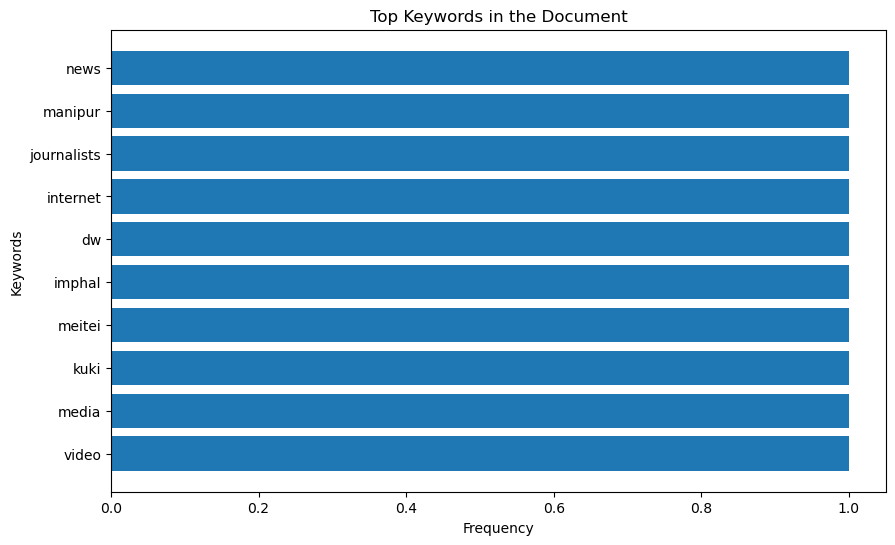

In [183]:
plt.figure(figsize=(10, 6))
plt.barh(keywords, frequencies)
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.title('Top Keywords in the Document')
plt.gca().invert_yaxis()
plt.show()


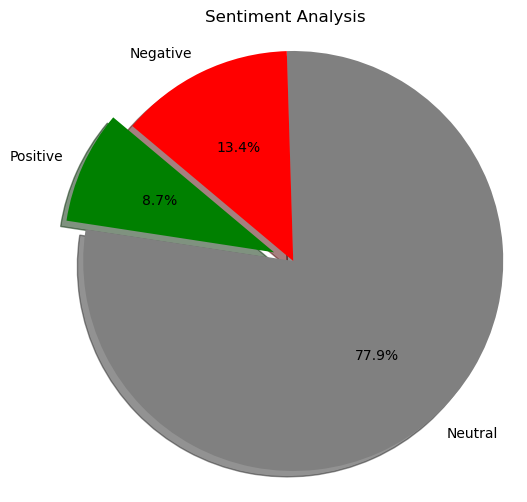

In [184]:
labels = ['Positive', 'Neutral', 'Negative']
sizes = [sentiment_scores['pos'], sentiment_scores['neu'], sentiment_scores['neg']]
colors = ['green', 'gray', 'red']
explode = (0.1, 0, 0)  # Explode the 1st slice (Positive)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Sentiment Analysis')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
